welcome to the world of wavelets

In [1]:
import pywt
import numpy as np
import soundfile as sf
from pywt import wavedec

In [ ]:
# level = 2
# input_file = "/content/drive/MyDrive/SEM-6/FOSP/Paper_Mini-Project/speech.wav"
 
# for i in range(10):

#   signal, sample_rate = sf.read(input_file)

#   # Define wavelet function and level of decomposition
#   wavelet = 'db1'
#   # level = 1

#   # Perform DWT
#   coeffs = pywt.wavedec(signal, wavelet, level=level)
#   # print(coeffs)
#   # Set detail coefficients to zero
#   zero_coeffs = [coeffs[0]] + [np.zeros_like(coeff) for coeff in coeffs[1:]]
#   # print(zero_coeffs)

#   # Reconstruct signal from wavelet coefficients with zero detail coefficients
#   reconstructed_signal = pywt.waverec(zero_coeffs, wavelet)

#   # Save reconstructed audio as .wav file
#   output_file = f"recon{i}.wav"
#   input_file = output_file
#   sf.write(output_file, reconstructed_signal, sample_rate)

In [3]:
import pywt
import numpy as np
import soundfile as sf
from pywt import wavedec
noOfTimesToPerformDWT=5
wavelet='db1'

# Load the initial audio signal
audio_file = 'speech.wav'

signal, sr = sf.read(audio_file)
print(f"Sampling rate: {sr} Hz")
print (f"Signal : {signal} ")

max_level = pywt.dwt_max_level(len(signal), wavelet)
level = min(5, max_level)  # Use up to 5 levels, or the maximum possible level
print(f"Level: {level}")
level=1

# Loop for multiple iterations
for i in range(noOfTimesToPerformDWT):

    # Perform the discrete wavelet transform
    coeffs = pywt.wavedec(signal, wavelet, level=i + 1)

    # Extract the approximation and detail coefficients
    cA = coeffs[0]
    cD = coeffs[1:]

    # Reconstruct the low-frequency and high-frequency signals
    for j in range(len(cD)):
        cD_flat = cD[j].ravel()  # Flatten the 2D array to 1D
        high_freq_signal = pywt.upcoef('d', cD_flat, wavelet, level=j+1)[:len(signal)]
        low_freq_signal = pywt.idwt(cA, None, wavelet)

    # Save the low-frequency and high-frequency signals as WAV files
    sf.write(f'low_freq_signal_{i}.wav', low_freq_signal, sr)
    sf.write(f'high_freq_signal_{i}.wav', high_freq_signal, sr)

    # Use the low-frequency signal as the input for the next iteration
    signal = cA

Sampling rate: 48000 Hz
Signal : [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
Level: 5


/home/karan/dev/FOSP/venv/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/karan/dev/FOSP/venv/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/karan/dev/FOSP/venv/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/karan/dev/FOSP/venv/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


: 

: 

In [4]:
audio_file = 'speech.wav'
signal, sr = sf.read(audio_file)
coeffs = wavedec(signal, 'db1', level=4)
cA, cD4, cD3,cD2, cD1 = coeffs
# cA, cD = coeffs
# print(cD)
sf.write(f'low.wav', cA, sr)
sf.write(f'high1.wav', cD1, sr)
sf.write(f'high2.wav', cD2, sr)
sf.write(f'high3.wav', cD3, sr)
sf.write(f'high4.wav', cD4, sr)
print("cA4:",cA)
print("cD2:",cD2)
print("cD1:",cD1)
# for x in cD1:
#   print(f"{x[0]:0,.6f}")

/home/karan/dev/FOSP/venv/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


cA4: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
cD2: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
cD1: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [5]:
speech=pywt.waverec(coeffs, 'db1')
sf.write('opspeech.wav',speech,sr)

In [5]:
import matplotlib.pyplot as plt

# Read in two audio files
file1 = 'opspeech.wav'
file2 = 'speech.wav'
signal1, sr1 = sf.read(file1)
signal2, sr2 = sf.read(file2)

# Compute the RMS error between the two signals
error = np.sqrt(np.mean((signal1 - signal2)**2))

# Display a plot comparing the two signals
t1 = np.arange(0, len(signal1)/sr1, 1/sr1)
t2 = np.arange(0, len(signal2)/sr2, 1/sr2)
plt.subplot(2, 1, 1)
plt.plot(t1, signal1)
plt.title('Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t2, signal2)
plt.title('Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Print the RMS error
print('RMS Error:', error)

: 

: 

ValueError: x and y must have same first dimension, but have shapes (12175186,) and (12175185, 1)

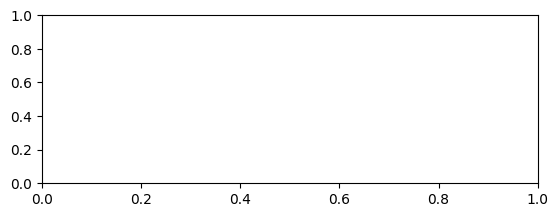

In [16]:
import matplotlib.pyplot as plt

# Read in two audio files
# file1 = '/content/drive/MyDrive/SEM-6/FOSP/Paper_Mini-Project/speech.wav'
# file1 = '/content/low_freq_signal_2.wav'
# file2 = '/content/low_freq_signal_3.wav'
# signal1, sr1 = sf.read(file1)
# signal2, sr2 = sf.read(file2)

sr1=44100
sr2=44100

signal1=np.array(cD1)

# signal1=cD1
signal2=np.array(cD2)

if len(signal1) > len(signal2):
    signal2 = np.resize(signal2, signal1.shape)
else:
    signal1 = np.resize(signal1, signal2.shape)


# Compute the RMS error between the two signals
error = np.sqrt(np.mean((signal1 - signal2)**2))

# Display a plot comparing the two signals
t1 = np.arange(0, len(signal1)/sr1, 1/sr1)
t2 = np.arange(0, len(signal2)/sr2, 1/sr2)
plt.subplot(2, 1, 1)
plt.plot(t1, signal1)
plt.title('Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t2, signal2)
plt.title('Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Print the RMS error
print('RMS Error:', error)

Huffman Begins

In [ ]:
import heapq
import os

class HuffmanCoding:

    def __init__(self, path):
        self.path = path
        self.heap = []
        self.codes = {}
        self.reverse_mapping = {}

    class HeapNode:
        def __init__(self, char, freq):
            self.char = char
            self.freq = freq
            self.left = None
            self.right = None

        def __lt__(self, other):
            return self.freq < other.freq

        def __eq__(self, other):
            if(other == None):
                return False
            if(not isinstance(other, HeapNode)):
                return False
            return self.freq == other.freq

    # functions for compression:

    def make_frequency_dict(self, text):
        frequency = {}
        for character in text:
            if not character in frequency:
                frequency[character] = 0
            frequency[character] += 1
        return frequency

    def make_heap(self, frequency):
        for key in frequency:
            node = self.HeapNode(key, frequency[key])
            heapq.heappush(self.heap, node)

    def merge_nodes(self):
        while(len(self.heap)>1):
            node1 = heapq.heappop(self.heap)
            node2 = heapq.heappop(self.heap)

            merged = self.HeapNode(None, node1.freq + node2.freq)
            merged.left = node1
            merged.right = node2

            heapq.heappush(self.heap, merged)

    def make_codes_helper(self, root, current_code):
        if(root == None):
            return

        if(root.char != None):
            self.codes[root.char] = current_code
            self.reverse_mapping[current_code] = root.char
            return

        self.make_codes_helper(root.left, current_code + "0")
        self.make_codes_helper(root.right, current_code + "1")

    def make_codes(self):
        root = heapq.heappop(self.heap)
        current_code = ""
        self.make_codes_helper(root, current_code)

    def get_encoded_text(self, text):
        encoded_text = ""
        for character in text:
            encoded_text += self.codes[character]
        return encoded_text

    def pad_encoded_text(self, encoded_text):
        extra_padding = 8 - len(encoded_text) % 8
        for i in range(extra_padding):
            encoded_text += "0"

        padded_info = "{0:08b}".format(extra_padding)
        encoded_text = padded_info + encoded_text
        return encoded_text

    def get_byte_array(self, padded_encoded_text):
        if(len(padded_encoded_text) % 8 != 0):
            print("Encoded text not padded properly")
            exit(0)

        b = bytearray()
        for i in range(0, len(padded_encoded_text), 8):
            byte = padded_encoded_text[i:i+8]
            b.append(int(byte, 2))
        return b

    def compress(self):
        filename, file_extension = os.path.splitext(self.path)
        output_path = filename + ".bin"

        with open(self.path, 'r+') as file, open(output_path, 'wb') as output:
            text = file.read()
            text = text.rstrip()

            frequency = self.make_frequency_dict(text)
            self.make_heap(frequency)
            self.merge_nodes()
            self.make_codes()

            encoded_text = self.get_encoded_text(text)
            padded_encoded_text = self.pad_encoded_text(encoded_text)

            b = self.get_byte_array(padded_encoded_text)
            output.write(bytes(b))

        print("Compressed")
        return output_path

    # functions for decompression
    def decompress(input_file, output_file):
      # Read the encoded binary file
      with open(input_file, 'rb') as f:
          encoded_data = f.read()

      # Convert the bytes to bits
      encoded_bits = ''.join(format(byte, '08b') for byte in encoded_data)

      # Read the frequency table from the encoded file
      freq_table_len = int(encoded_bits[:32], 2)
      freq_table_bits = encoded_bits[32:32+freq_table_len]
      freq_table = huffman.freq_table_from_bits(freq_table_bits)

      # Decode the rest of the bits using the frequency table
      decoded_bits = huffman.decode_bits(encoded_bits[32+freq_table_len:], freq_table)

      # Convert the decoded bits to bytes
      decoded_bytes = bytearray(int(decoded_bits[i:i+8], 2) for i in range(0, len(decoded_bits), 8))

      # Write the decoded bytes to the output file
      with open(output_file, 'wb') as f:
          f.write(decoded_bytes)


In [ ]:
import huffman
import struct

def compress_audio_huffman(input_file, output_file):
    # Read the input audio file
    with open(input_file, 'rb') as f:
        audio_data = f.read()

    # Convert the audio data to a list of integers (16-bit samples)
    audio_samples = struct.unpack('<' + 'h'*int(len(audio_data)/2), audio_data)

    # Count the frequency of each sample value
    freq_table = {}
    for sample in audio_samples:
        if sample not in freq_table:
            freq_table[sample] = 1
        else:
            freq_table[sample] += 1

    # Build the Huffman code from the frequency table
    code_table = huffman.code_table_from_freq(freq_table)

    # Convert the audio samples to a string of bits using the Huffman code
    encoded_bits = ''.join(code_table[sample] for sample in audio_samples)

    # Convert the bit string to bytes (8 bits per byte)
    encoded_bytes = bytearray(int(encoded_bits[i:i+8], 2) for i in range(0, len(encoded_bits), 8))

    # Write the frequency table and encoded data to the output file
    with open(output_file, 'wb') as f:
        # Write the length of the frequency table as a 32-bit integer
        f.write(struct.pack('I', len(freq_table)))

        # Write the frequency table as a sequence of bits
        freq_table_bits = huffman.freq_table_to_bits(freq_table)
        f.write(freq_table_bits)

        # Write the encoded data as bytes
        f.write(encoded_bytes)


In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import huffman

# read audio file
fs, audio = wav.read("/content/drive/MyDrive/SEM-6/FOSP/Paper_Mini-Project/speech.wav")

# calculate histogram
hist, bins = np.histogram(audio, bins=2**16)
hist = hist.astype(float)

# normalize histogram
hist /= hist.sum()

# generate Huffman codebook
codebook = huffman.codebook(huffman.Tree(zip(bins.astype(str), hist)))

# encode audio using Huffman codebook
encoded_audio = np.array([codebook[str(sample)] for sample in audio])

# save encoded audio to file
np.save("encoded_audio.npy", encoded_audio)

# save Huffman codebook to file
with open("huffman_codebook.pkl", "wb") as f:
    huffman.dump(codebook, f)

TypeError: ignored